### **Import Necessory Libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **Loading Data**

In [2]:
df = pd.read_csv(r"C:\Users\adity\Documents\Machine Learning\K-Means_Cluster\Datasets\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Data Exploring**

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### **Data Cleaning**

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df1 = df.drop('CustomerID', axis=1)
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df1['Genre'].replace(['Male', 'Female'],[0,1],inplace=True)

### **Data Visulatition**

<Figure size 1000x800 with 0 Axes>

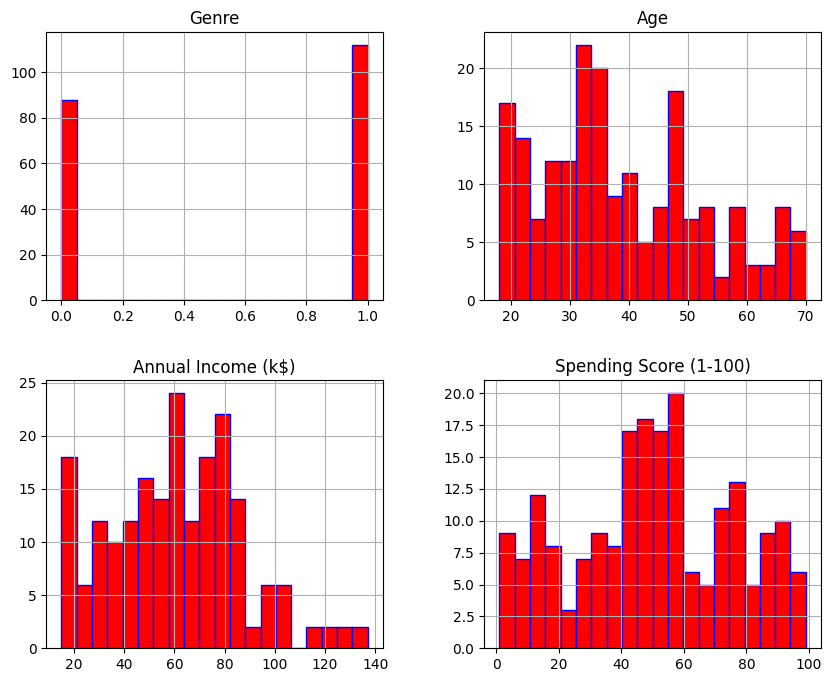

In [11]:
plt.figure(figsize=(10, 8))
df1.hist(figsize=(10, 8), bins=20,color='red', edgecolor='b')
plt.show()

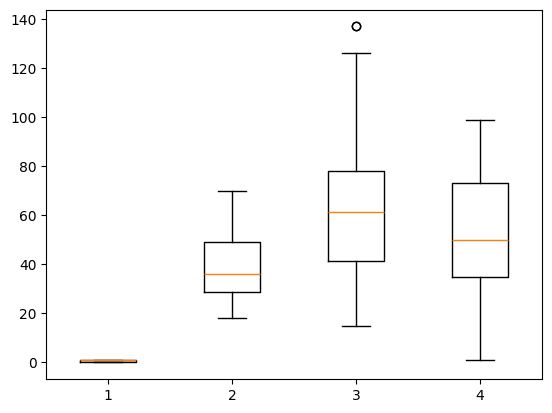

In [12]:
plt.boxplot(df1)
plt.show()

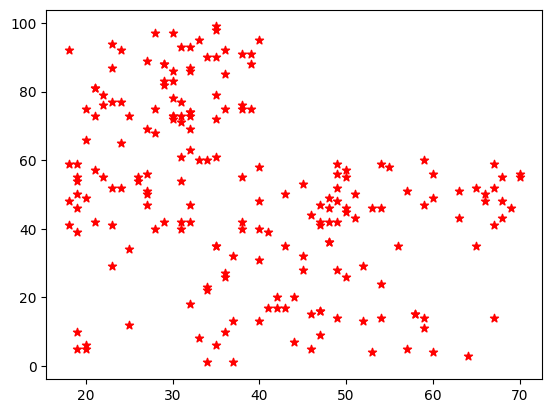

In [13]:
plt.scatter(df1['Age'], df1['Spending Score (1-100)'],marker='*', color='red')
plt.show()

### **Building Model**

In [14]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
x.shape

(200, 2)

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Finding WSSE**

In [17]:
wsse = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    wsse.append(km.inertia_)

In [18]:
# pip install kneed

In [19]:
from kneed import KneeLocator

In [20]:
k_l = KneeLocator(range(1,11), wsse, curve='convex', direction='decreasing')
optimal_k = k_l.knee

### **Choose The Centeroid**

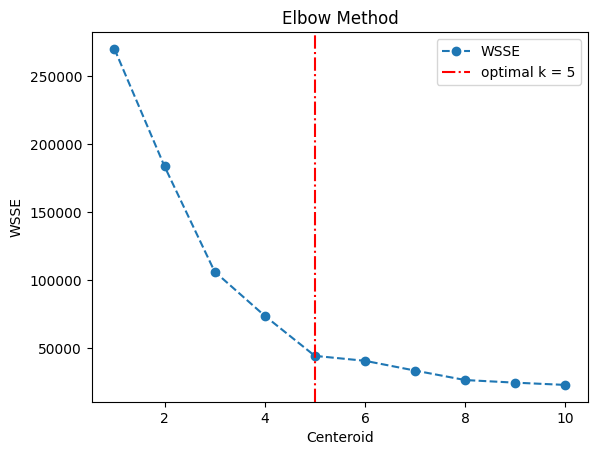

In [21]:
plt.plot(range(1,11), wsse, marker='o', linestyle='--', label='WSSE')
plt.axvline(x=optimal_k, color='r', linestyle='-.', label=f"optimal k = {optimal_k}")
plt.xlabel('Centeroid')
plt.ylabel('WSSE')
plt.title('Elbow Method')
plt.legend()
plt.show()

### **Initial The Model**

In [22]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [23]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [24]:
pred = model.predict(x)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [25]:
model.inertia_

44448.45544793371

### **Model Evaluation**

In [26]:
silhouette_score = silhouette_score(x, pred)
print(silhouette_score)

0.553931997444648


### **New Date Prediction**

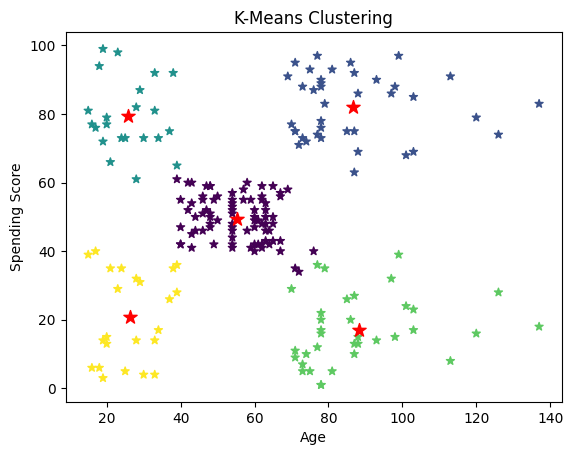

In [27]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=pred , cmap='viridis', marker='*')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red', marker='*')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()

In [28]:
new_data = [[17, 50]]
pred1 = model.predict(new_data)
pred1[0]

np.int32(4)